In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("card_transdata.csv")

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
pd.DataFrame(df.iloc[1,:]).transpose()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0


In [5]:
df.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [6]:
rf=df[df.fraud==0.0]

In [7]:
rf1=df[df.fraud==1.0]
rf2=rf.sample(300000)

In [8]:
rf2.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.0
mean,22.923618,4.247208,1.427813,0.881937,0.359080,0.109693,0.623047,0.0
std,51.853788,18.053670,1.998339,0.322684,0.479732,0.312508,0.484624,0.0
min,0.021322,0.000419,0.004399,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.835473,0.293535,0.450096,1.000000,0.000000,0.000000,0.000000,0.0
50%,9.709938,0.982946,0.915651,1.000000,0.000000,0.000000,1.000000,0.0
75%,24.118983,3.266256,1.791933,1.000000,1.000000,0.000000,1.000000,0.0
max,3981.367512,3437.278746,267.802942,1.000000,1.000000,1.000000,1.000000,0.0


In [9]:
main_df = df.drop(rf2.index)

In [10]:
main_df.fraud.value_counts()

0.0    612597
1.0     87403
Name: fraud, dtype: int64

In [11]:
df=main_df.copy()

In [12]:
df.fraud.value_counts()

0.0    612597
1.0     87403
Name: fraud, dtype: int64

In [13]:
y=df["fraud"]
df1=df.drop("fraud",axis=1)

In [14]:
df1.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [15]:
df1.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
dtype: object

In [16]:
df1.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,28.216724,5.374796,1.994054,0.881364,0.346679,0.096714,0.662340
std,70.340294,28.531147,3.064163,0.323360,0.475913,0.295569,0.472912
min,0.004874,0.000118,0.007278,0.000000,0.000000,0.000000,0.000000
25%,3.895847,0.297999,0.487725,1.000000,0.000000,0.000000,0.000000
50%,10.085063,1.004921,1.039303,1.000000,0.000000,0.000000,1.000000
75%,26.505248,3.396259,2.266930,1.000000,1.000000,0.000000,1.000000
max,10632.723672,11851.104565,266.689692,1.000000,1.000000,1.000000,1.000000


In [17]:
df1[df1.distance_from_home>df1.distance_from_home.mean()+(13*df1.distance_from_home.std())]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
412,965.910612,0.023604,0.257908,1.0,0.0,0.0,1.0
4038,2033.498174,0.783480,9.534812,1.0,0.0,0.0,0.0
9703,1071.554384,10.143118,1.219291,1.0,0.0,0.0,1.0
9931,1207.134491,0.318389,0.276731,1.0,0.0,0.0,0.0
11584,1058.229818,0.175199,0.340195,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
986142,1487.394251,2.332657,4.025897,1.0,0.0,0.0,0.0
991991,1018.764185,0.095766,7.486603,1.0,0.0,0.0,0.0
994109,2120.336604,12.243327,0.363797,1.0,0.0,0.0,1.0
994176,1182.070070,25.658925,1.379989,1.0,0.0,0.0,1.0


In [18]:
y.value_counts()

0.0    612597
1.0     87403
Name: fraud, dtype: int64

In [19]:
87403/(912597+87403)

0.087403

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
cv=ColumnTransformer([
    ("Standard",StandardScaler(),[0,1,2])
],remainder="passthrough")
df2=cv.fit_transform(df1)

In [21]:
g=df1.columns
g=g.to_list()

In [22]:
df3=pd.DataFrame(df2,columns=g)
df3.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.421681,-0.177478,-0.015702,1.0,1.0,0.0,0.0
1,-0.247181,-0.182229,-0.228394,1.0,0.0,0.0,0.0
2,-0.328768,-0.160163,-0.511181,1.0,0.0,0.0,1.0
3,-0.369193,0.007895,-0.532411,1.0,1.0,0.0,1.0
4,0.227099,-0.168529,0.074641,1.0,1.0,0.0,1.0


In [23]:
df3.iloc[1214]

distance_from_home                0.296417
distance_from_last_transaction    0.222015
ratio_to_median_purchase_price   -0.468362
repeat_retailer                   1.000000
used_chip                         0.000000
used_pin_number                   0.000000
online_order                      1.000000
Name: 1214, dtype: float64

In [24]:
y[13]

1.0

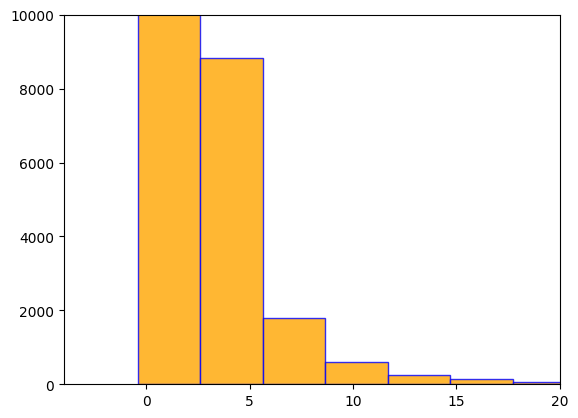

In [25]:
plt.hist(df3["distance_from_home"],bins=50,color="orange",alpha=0.8,edgecolor="blue")
plt.xlim(-4,20)
plt.ylim(0,10000)
plt.show()

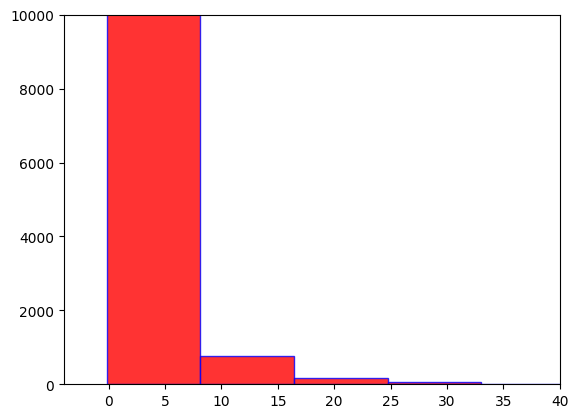

In [26]:
plt.hist(df3["distance_from_last_transaction"],bins=50,color="red",alpha=0.8,edgecolor="blue")
plt.xlim(-4,40)
plt.ylim(0,10000)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(df3,y,random_state=12,test_size=0.2,stratify=y)

In [29]:
len(x_train)

560000

In [30]:
len(y_train)

560000

In [31]:
y_train.value_counts()

0.0    490078
1.0     69922
Name: fraud, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
f=SMOTE(sampling_strategy="minority")

In [34]:
x_train,y_train=f.fit_resample(x_train,y_train)

In [35]:
len(x_train)

980156

In [36]:
len(y_train)

980156

In [37]:
y_train.value_counts()

0.0    490078
1.0    490078
Name: fraud, dtype: int64

In [38]:
y_test.value_counts()

0.0    122519
1.0     17481
Name: fraud, dtype: int64

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [64]:
model=RandomForestClassifier(n_estimators=10)

In [65]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [42]:
model.score(x_test,y_test)

0.9999785714285714

In [43]:
y_pred=model.predict(x_test)

In [49]:
y_pred

array([1., 0., 1., ..., 0., 0., 0.])

In [44]:
from sklearn.metrics import classification_report
CR=classification_report(y_test,y_pred)

In [45]:
print(CR)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    122519
         1.0       1.00      1.00      1.00     17481

    accuracy                           1.00    140000
   macro avg       1.00      1.00      1.00    140000
weighted avg       1.00      1.00      1.00    140000



In [46]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test,y_pred)


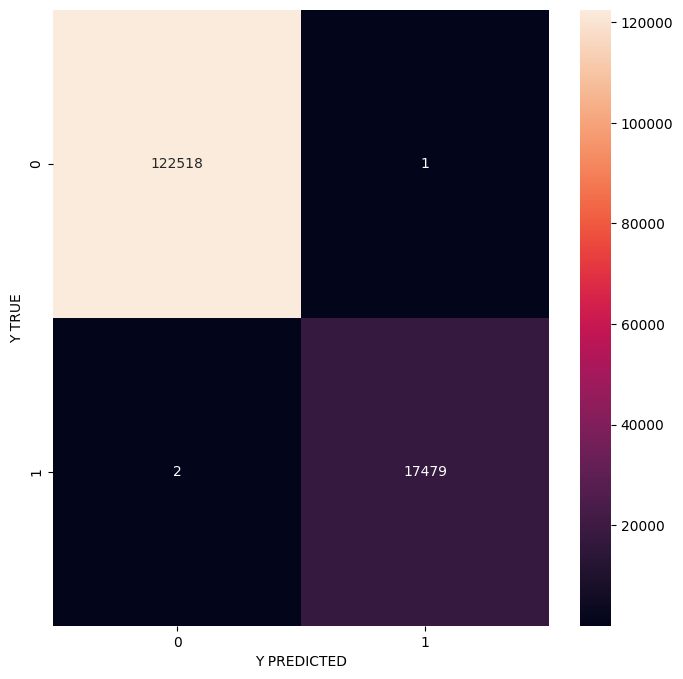

In [47]:
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(CM,annot=True,fmt="d")
plt.ylabel("Y TRUE")
plt.xlabel("Y PREDICTED")
plt.show()

In [48]:
import pickle
with open("Credit.pickle4","wb") as fg:
    pickle.dump(model,fg)